O autômato fornecido é um AFD: True
Passo 1-1:
[   [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 1-2:
[   [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 1-3:
[   [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 1-4:
[   [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 1-5:
[   [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 2-1:
[   [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 2-2:
[   [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 2-3:
[   [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]]

Passo 2-4:
[   [0, 1, 0, 0, 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for forbiddenfruit: filename=forbiddenfruit-0.1.4-py3-none-any.whl size=21791 sha256=bf8f2c60150a0ebd46eb56229764805f9d5beba6b1604f725bba0181a6b4f06e
  Stored in directory: /root/.cache/pip/wheels/0c/f3/30/e6e3c3f32fbcda46da9c9828bb1268f43b422559ba6d9d5dde
Successfully built forbiddenfruit


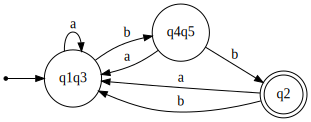

In [1]:
# Biblioteca para poder chamar sys.exit() quando o automato não for um AFD
import sys
# Biblioteca para poder personalizar o print (usamos mais na exibição do passo a passo do preenchimento da tabela de equivalência)
import pprint
# Abrir o arquivo
arquivo = open('automato3.txt', 'r')
lines = arquivo.readlines()
# Fechar o arquivo
arquivo.close()

alphabet = []  # Inicializa a lista alphabet
states = []  # Inicializa a lista states
initial_state = ''  # Inicializa a string para estado inicial
accepting_states = []  # Inicializa lista para estados finais ou de aceitação
transitions = {}  # Inicializa o dicionário para as transições

# Encontrar os valores correspondentes nas linhas
alphabet = lines[0].strip().split(": ")[1].split(", ")
states = lines[1].strip().split(": ")[1].split(", ")
initial_state = lines[2].strip().split(": ")[1]
accepting_states = lines[3].strip().split(": ")[1].split(", ")
# Criar a lista de transições da tabela
transitions = []
for line in lines[5:]:
    line = line.strip()  # Remover espaços em branco e caracteres de quebra de linha
    if line:
        transition = tuple(line.split(", "))  # Separar os valores da linha em uma tupla
        transitions.append(transition)


dict_trans = {}
for transicao in transitions:
    estado_origem, estado_destino, simbolo = transicao
    if estado_origem not in dict_trans:
        dict_trans[estado_origem] = {}
    dict_trans[estado_origem][simbolo]= estado_destino

def exibir_info():
    print('States:', states)
    print('Alphabet:', alphabet)
    print('Initial State:', initial_state)
    print('Accepting States:', accepting_states)
    print('Transitions:')
    for state, state_transitions in dict_trans.items():
        for symbol, next_state in state_transitions.items():
            print(f'{state} --({symbol})--> {next_state}')


# Código para verificar se o AFD é válido
def is_afd(states, initial_state, accepting_states, alphabet, transition_table):
    # Verifica se o estado inicial está presente no conjunto de estados
    if initial_state not in states:
        return False

    # Verifica se todos os estados de aceitação estão presentes no conjunto de estados
    if not set(accepting_states).issubset(states):
        return False

    # Verifica se todos os símbolos do alfabeto estão presentes na tabela de transição
    for state_transitions in transition_table.values():
        if not set(alphabet).issubset(state_transitions.keys()):
            return False

    # Verifica se a tabela de transição possui uma única transição para cada estado e símbolo do alfabeto
    for state, state_transitions in transition_table.items():
        if len(state_transitions) != len(alphabet):
            return False
        for symbol in alphabet:
            if symbol not in state_transitions:
                return False

    return True


# Código para minimizar AFD
def minimization(table, states, initial_state, accepting_states, alphabet):
    # Essa parte realiza a marcação na tabela de acordo com a combinação de estados ser final/n_final ou n_final/final
    equivalence_table = [[0] * len(states) for _ in range(len(states))]
    for i in range(len(states)):
        for j in range(len(states)):
            if (states[i] in accepting_states and states[j] not in accepting_states) or \
                    (states[i] not in accepting_states and states[j] in accepting_states):
                equivalence_table[i][j] = 1
            print(f"Passo {i + 1}-{j + 1}:")
            pprint.pprint(equivalence_table, width=30, indent=4)
            print()

    # Essa parte marca de acordo com o símbolo visto pelos dois estados que não estão marcados
    # se a combinação de estados encontrados estiver marcada, marca também os que fizeram a transição
    changed = True
    while changed:
        changed = False
        for i in range(len(states)):
            for j in range(i + 1, len(states)):
                if equivalence_table[i][j] == 0:
                    for symbol in alphabet:
                        next_state_i = table[states[i]][symbol]
                        next_state_j = table[states[j]][symbol]
                        index_i = states.index(next_state_i)
                        index_j = states.index(next_state_j)
                        if equivalence_table[index_i][index_j] == 1:
                            equivalence_table[i][j] = 1
                            changed = True
                            break
                    print(f"Passo {i + 1}-{j + 1}:")
                    pprint.pprint(equivalence_table, width=30, indent=4)
                    print()

    new_states = []  # Aqui vai conter todos os estados
    new_initial_state = None  # Vai conter todos os estados iniciais, sejam eles minimizados ou não
    new_accepting_states = []  # Vai conter todos os estados de aceitação(ou finais)
    new_table = {}  # Irá conter as novas transições

    ja_add = []  # Lista onde serão colocados os estados que foram concatenados e inseridos na lista "new_states"

    # Função para percorrer toda a tabela de equivalência
    for i in range(len(states)):
        for j in range(i + 1, len(states)):
            # Se a casa da tabela não estiver marcada e o estado for um estado inicial
            # Então são concatenados os estados i e j referentes a casa e adicionados
            # na lista "new_initial_states". Os estados i e j também são adicionados na lista "ja_add"
            if equivalence_table[i][j] == 0:
                if states[i] in initial_state:
                    new_initial_state = (states[i] + states[j])
                    if states[i] not in ja_add or states[j] not in ja_add:
                        ja_add.append(states[i])
                        ja_add.append(states[j])
                # Mesma coisa do caso anterior, porém com os estados finais
                if states[i] in accepting_states:
                    new_accepting_states.append(states[i] + states[j])
                    if states[i] not in ja_add or states[j] not in ja_add:
                        ja_add.append(states[i])
                        ja_add.append(states[j])
                # Mesma coisa, porem com todos os estados que não são nem iniciais, nem finais
                new_states.append(states[i] + states[j])
                # Adiciona os estados que foram concatenados em "new_states" a lista "ja_add" também
                if states[i] not in ja_add or states[j] not in ja_add:
                    ja_add.append(states[i])
                    ja_add.append(states[j])

    # Testa se o estado inicial foi minimizado e posto dentro de "new_initial_state"
    # se não, então coloca o estado inicial dentro
    if new_initial_state == None:
        new_initial_state = initial_state

    # Testa se o estado final(ou de aceitação) original está dentro da lista de novos estados finais minimizados
    # caso não esteja, coloca o esatdo final não minimizado dentro da nova lista
    for i in range(len(accepting_states)):
        if accepting_states[i] not in ja_add:
            new_accepting_states.append(accepting_states[i])

    # Pega os estados que não foram concatenados e coloca dentro da lista "new_states"
    for i in range(len(states)):
        if states[i] not in new_states:
            if states[i] not in ja_add:
                new_states.append(states[i])

                # Nova lista para conter os estados originais
    origin_states = []

    # Pega todos os origin_states da lista "states" e transfere para a lista "estados"
    for i in range(len(states)):
        origin_states.append(states[i])

    for i in range(len(states)):
        for j in range(len(ja_add)):
            if states[i] in ja_add[j]:
                new_state_index = j // 2 if j % 2 == 0 else (j - 1) // 2
                states[i] = new_states[new_state_index]
                break

    # Percorre toda a lista de origin_states originais
    for i in range(len(origin_states)):
        for symbol in alphabet:
            # Armazena o estado resultante na variável troca
            troca = table[origin_states[i]][symbol]
            # Testa se a variável está na lista "ja_add", se estiver, a variavel troca
            # recebe seu equivalente minimizado da lista "new_states"
            if troca in ja_add:
                new_state_index = ja_add.index(troca) // 2
                troca = new_states[new_state_index]
            # O dicinario table recebe troca como retorno do estado e símbolo em
            table[origin_states[i]][symbol] = troca

    # Criar um novo dicionário
    novo_dicionario = {}

    # Iterar sobre cada elemento da lista
    for string_original in origin_states:
        # Dividir a string original em duas
        nova_string1 = string_original[0]  # 'q'
        nova_string2 = string_original[1]  # '1'

        # Acessar o valor do dicionário original correspondente à chave atual
        valor_original = table[string_original]

        # Atribuir o valor original às novas chaves do novo dicionário
        novo_dicionario[nova_string1] = valor_original
        novo_dicionario[nova_string2] = valor_original

    # Parte que coloca as novas transições
    for new_state in states:
        new_table[new_state] = {}
        for symbol in alphabet:
            next_states = set()
            for original_state in new_state:
                if original_state != 'q':
                    next_state = novo_dicionario[original_state][symbol]
                    next_states.add(next_state)
                merged_state = ''.join(sorted(next_states))
                new_table[new_state][symbol] = merged_state

    return new_states, new_initial_state, new_accepting_states, alphabet, new_table


# Código para printar as novas variáveis
def print_output(new_states, new_initial_state, new_accepting_states, alphabet, new_table):
    print("Estados minimizados:", new_states)
    print("Estado inicial minimizado:", new_initial_state)
    print("Estados de aceitação minimizados:", new_accepting_states)
    print("Alfabeto:", alphabet)
    print("Tabela de transições minimizada:")
    for state, transitions in new_table.items():
        print(f"{state}: {transitions}")



# Verifica se o afd inserido é válido
is_valid_afd = is_afd(states, initial_state, accepting_states, alphabet, dict_trans)
print("O autômato fornecido é um AFD:", is_valid_afd)
if is_valid_afd == False:
    sys.exit()

# Chamada do algoritmo de minimização
new_states, new_initial_state, new_accepting_states, alphabet, new_transitions = minimization(dict_trans, states,
                                                                                              initial_state,
                                                                                              accepting_states,
                                                                                              alphabet)

# Impressão das saídas
print_output(new_states, new_initial_state, new_accepting_states, alphabet, new_transitions)

# Criando copias das listas, porém como dicionário para que funcionem na lib para gerar o afd na tela
new_statesd = {}
new_accepting_statesd = {}
alphabetd = {}

# Colocando os elementos das listas dentro dos seus dicionários equivalentes
new_statesd = set(new_states)
new_accepting_statesd = set(new_accepting_states)
alphabetd = set(alphabet)

# Instalando os lib necessários para que a biblioteca da interface do automato funcione
!pip install automata-lib
!pip install pandas
!pip install graphviz
!pip install colormath
!pip install jupyterlab

!pip install visual-automata

from automata.fa.dfa import DFA

from visual_automata.fa.dfa import VisualDFA

# Armazenando as informações do afd minimizado
dfa = VisualDFA(
    states = new_statesd,
    input_symbols=alphabetd,
    transitions = new_transitions,
    initial_state= new_initial_state,
    final_states=new_accepting_statesd,
)

# Função para mostrar o afd na tela
dfa.show_diagram()